# Arbeidskrav 10: maskinlæring

Les inn demodatasettet for brystkreft og utforsk det ved å plotte ulike data mot hverandre. Ser det ut til å være lett å skille de godartede og ondartede svulstene fra hverandre?

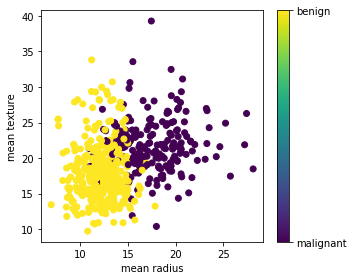

In [75]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
%matplotlib inline

dataset = sklearn.datasets.load_breast_cancer()

dataset.feature_names


# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dataset.data[:, x_index], dataset.data[:, y_index], c=dataset.target)
plt.colorbar(ticks=[0, 1], format=formatter)
plt.xlabel(dataset.feature_names[x_index])
plt.ylabel(dataset.feature_names[y_index])

plt.tight_layout()
plt.show()

Del datasettet `dataset.data` og fasiten `dataset.target` i to deler, `train` og `train_target`, og `test` og `test_target` – en for trening og en for testing – på følgende måte

<function matplotlib.pyplot.show(*args, **kw)>

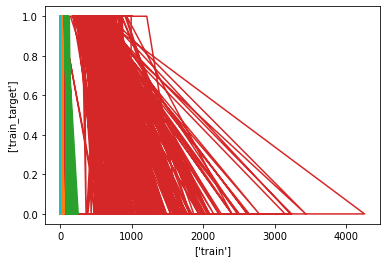

In [76]:
from sklearn import model_selection
train, test, train_target, test_target = model_selection.train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=0)

#print('Traning\n\n',train,train_target)
#print('Test Target\n\n',test,test_target)



plt.plot(train,train_target)
plt.xlabel(['train'])
plt.ylabel(['train_target'])

plt.show





<function matplotlib.pyplot.show(*args, **kw)>

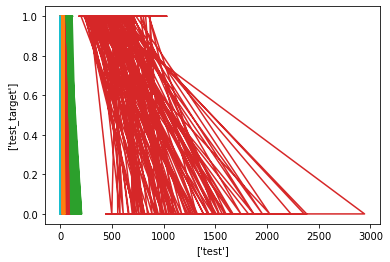

In [61]:
plt.plot(test,test_target)
plt.xlabel(['test'])
plt.ylabel(['test_target'])


plt.show

Velg minst én maskinlæringsmetode for klassifikasjon (f.eks. kNN eller SVM), og tren den vha. treningsdatasettet.

(5.714317921146954, 29.37668207885304, 7.779692604856514, 41.21030739514349)

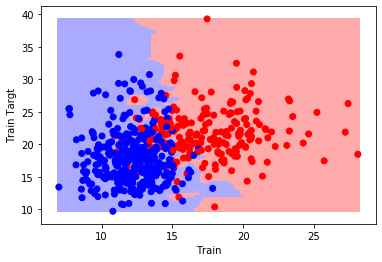

In [82]:


import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

dataset = sklearn.datasets.load_breast_cancer()
X = dataset.data[:, :2] 

y = dataset.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('Train')
plt.ylabel('Train Targt')
plt.axis('tight')

Test metoden på testdataene og beregn presicion, $p = N_{tp} / (N_{tp} + N_{fp})$, og recall, $r = N_{tp} / (N_{tp} + N_{fn})$. Hva er de praktiske for konsekvensene for pasientene når $p$ er lav? Og når $r$ er lav?

In [103]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


X = dataset.data

y = dataset.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,

                                        test_size=0.25, random_state=0)



clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_pred = clf.predict(X_test)



In [100]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        53
           1       0.92      0.94      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



Beregn også $F_1 = 2 N_{tp} / (2 N_{tp} + N_{fp} + N_{fn})$. Hvem klarer å få den høyeste...?

In [110]:
metrics.f1_score(y_test, y_pred, average="macro")

0.9093406593406592

In [116]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0